In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # only for convenience
from analysis import *

# Load and prepare data

In [2]:
# Load data with cue at S
cues_X_es = []
cues_spikes = []
for i in range(40, 40 + seeds_num):
    data = load_data("./data/seqlearn_cues_v4_seed{}.pickle".format(i))
    cues_X_es.append(data["X_e"])
    cues_spikes.append(data["spikes"])

In [3]:
# Load data with cue at M
cuem_X_es = []
cuem_spikes = []
for i in range(0, 0 + seeds_num):
    data = load_data("./data/seqlearn_cuem_v4_seed{}.pickle".format(i))
    cuem_X_es.append(data["X_e"])
    cuem_spikes.append(data["spikes"])

In [4]:
# Load data with cue at G
cueg_X_es = []
cueg_spikes = []
for i in range(20, 20 + seeds_num):
    data = load_data("./data/seqlearn_cueg_v4_seed{}.pickle".format(i))
    cueg_X_es.append(data["X_e"])
    cueg_spikes.append(data["spikes"])

In [5]:
# Helper function to determine Spearman CCs
def sp_corr_all(X_es, spikes, start_time, clu_seq=np.arange(clu_num)):
    spCCs = []
    for i in tqdm(range(len(X_es))):
        clu_neurs = get_cluster_neurons(X_es[i])
        spikes_dic = spikes[i]
        firing_times = []
        for clu in range(clu_num):
            spikes_clu = get_spikes(clu_neurs[clu], spikes_dic, start_time)
            firing_times.append(rates_ftimes(spikes_clu, start_time, len(clu_neurs[clu]))[1])
        firing_times = np.array(firing_times).T
        spCCs.append(sp_corr(firing_times, clu_seq))
    return np.concatenate(spCCs)

In [6]:
# Compute Spearman CCs
af_time = growth_time + test_time + 2*relax_time + learn_time
cues_spCCs_bf = sp_corr_all(cues_X_es, cues_spikes, growth_time)
cues_spCCs_af = sp_corr_all(cues_X_es, cues_spikes, af_time)
cuem_spCCs_bf = sp_corr_all(cuem_X_es, cuem_spikes, growth_time)
cuem_spCCs_af = sp_corr_all(cuem_X_es, cuem_spikes, af_time)
cueg_spCCs_bf = sp_corr_all(cueg_X_es, cueg_spikes, growth_time, clu_seq=np.arange(clu_num)[::-1])
cueg_spCCs_af = sp_corr_all(cueg_X_es, cueg_spikes, af_time, clu_seq=np.arange(clu_num)[::-1])

# Figure

In [7]:
# Helper function to plot Spearman CCs
def plot_spCC(ax, spCCs_bf, spCCs_af):
    ax.hist(spCCs_bf, cumulative=True, 
            density=True, histtype="step", color='k', ls=":", range=(-1, 1), bins=500)
    ax.hist(spCCs_af, cumulative=True, 
            density=True, histtype="step", color='k', ls="-", range=(-1, 1), bins=500)
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Spearman CC")

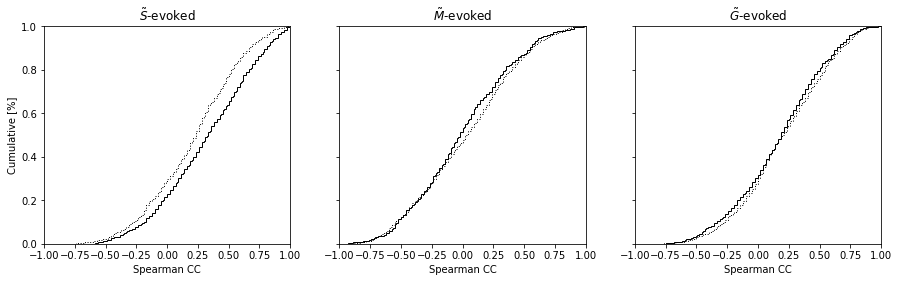

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

# Panel A
ax = axs[0]
plot_spCC(ax, cues_spCCs_bf, cues_spCCs_af)
ax.set_ylabel("Cumulative [%]")
ax.set_title(r"$\tilde{S}$-evoked")

# Panel B
ax = axs[1]
plot_spCC(ax, cuem_spCCs_bf, cuem_spCCs_af)
ax.set_title(r"$\tilde{M}$-evoked")

# Panel C
ax = axs[2]
plot_spCC(ax, cueg_spCCs_bf, cueg_spCCs_af)
ax.set_title(r"$\tilde{G}$-evoked")

plt.show()